In [1]:
import pandas as pd 


In [2]:
file_path= "african_crises.csv"
df=pd.read_csv(file_path)
df_bk=df.copy()




In [3]:
df.info()
df.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [4]:
missing=df.isnull().sum()
print(missing)

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64


In [5]:
print(df.describe())

              case         year  systemic_crisis     exch_usd  \
count  1059.000000  1059.000000      1059.000000  1059.000000   
mean     35.613787  1967.767705         0.077432    43.140831   
std      23.692402    33.530632         0.267401   111.475380   
min       1.000000  1860.000000         0.000000     0.000000   
25%      15.000000  1951.000000         0.000000     0.195350   
50%      38.000000  1973.000000         0.000000     0.868400   
75%      56.000000  1994.000000         0.000000     8.462750   
max      70.000000  2014.000000         1.000000   744.306139   

       domestic_debt_in_default  sovereign_external_debt_default  \
count               1059.000000                      1059.000000   
mean                   0.039660                         0.152975   
std                    0.195251                         0.360133   
min                    0.000000                         0.000000   
25%                    0.000000                         0.000000   
50%   

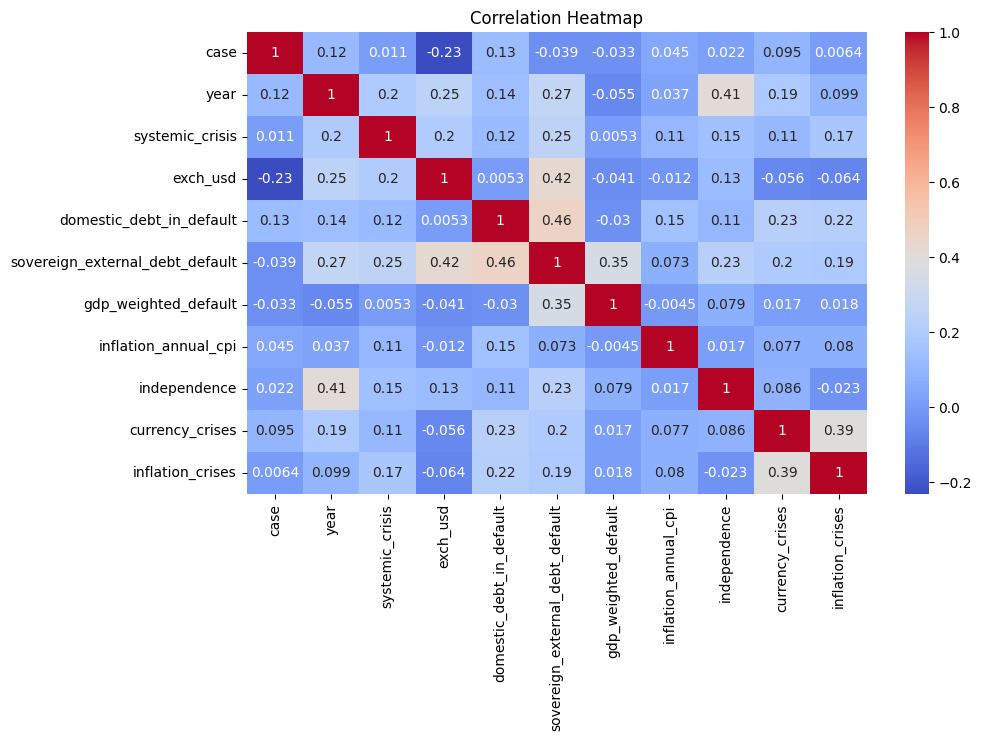

In [6]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Distribution of banking crisis
fig = px.histogram(df, x='banking_crisis', color='banking_crisis', color_discrete_map={'crisis': 'red', 'no_crisis': 'blue'}, template='plotly_white')
fig.update_layout(title='Banking Crisis Distribution')
fig.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        print(col)
        df[col]=le.fit_transform(df[col])








cc3
country
banking_crisis


In [9]:
x=df.drop('banking_crisis', axis=1)
y=df['banking_crisis']

In [10]:
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler(sampling_strategy=0.15)
X_over,y_over=oversample.fit_resample(x,y)
print('Oversampled class distributin:')
print(pd.Series(y_over).value_counts())

Oversampled class distributin:
banking_crisis
1    965
0    144
Name: count, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, test_size=0.3, random_state=42)
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (776, 13)
Test shape: (333, 13)


In [12]:
from sklearn.preprocessing  import MinMaxScaler
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression 

In [14]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
import pickle
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print('Model saved as logistic_regression_model.pkl')